# Pandas cheat sheet - part 4

#### by May 2, 2019

## 9. Combine Data Sets

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [3]:
adf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
    "x2" : [1, 2, 3]}
)

adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [7]:
bdf = pd.DataFrame(
    {"x1" : ['A', 'B', 'D'],
    "X3" : ['T', 'F', 'T']}
)

bdf

,x1,X3
0,A,T
1,B,F
2,D,T


### Standard Joins

In [8]:
pd.merge(adf, bdf, how='left' , on='x1') # on is key

,x1,x2,X3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [9]:
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,X3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [10]:
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,X3
0,A,1,T
1,B,2,F


In [11]:
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,X3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


### Filtering Joins

In [13]:
bdf.x1

0    A
1    B
2    D
Name: x1, dtype: object

In [14]:
adf.x1.isin(bdf.x1)

0     True
1     True
2    False
Name: x1, dtype: bool

In [15]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [16]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [17]:
ydf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
    "x2" : [1, 2, 3]}
)
ydf

,x1,x2
0,A,1
1,B,2
2,C,3


In [18]:
zdf = pd.DataFrame(
    {
        "x1" : ['B', 'C', 'D'],
        "x2" : [2, 3, 4]
    }
)
zdf

,x1,x2
0,B,2
1,C,3
2,D,4


In [19]:
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [20]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [24]:
pd.merge(ydf, zdf, how='outer', indicator = True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [26]:
pd.merge(ydf, zdf, how='outer', indicator = True).query('_merge == "left_only"')

,x1,x2,_merge
0,A,1,left_only


In [25]:
pd.merge(ydf, zdf, how='outer', indicator = True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


## 10. Group Data

In [6]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
# Return a GroupBy object

gdf = df.groupby(by='origin')
gdf.size()

origin
europe     70
japan      79
usa       249
dtype: int64

In [16]:
df.groupby(by='origin')['cylinders'].mean()

origin
europe    4.157143
japan     4.101266
usa       6.248996
Name: cylinders, dtype: float64

In [21]:
pd.DataFrame(df.groupby(['model_year', 'origin'])['cylinders'].mean()).head()

cylinders
model_year origin           
70         europe   4.000000
           japan    4.000000
           usa      7.636364
71         europe   4.000000
           japan    4.000000

In [23]:
df2 = pd.DataFrame(
    [[4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]],
    index = [1, 2, 3],
    columns = ['a', 'b', 'c']
)


df2

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [24]:
# shitf: Copy with values shifted by 1

df2.shift(1)

,a,b,c
1,NaN,NaN,NaN
2,4.0,7.0,10.0
3,5.0,8.0,11.0


In [25]:
# Copy with values lagged by 1

df2.shift(-1)

,a,b,c
1,5.0,8.0,11.0
2,6.0,9.0,12.0
3,NaN,NaN,NaN


In [26]:
df2['b'].shift(2)

1    NaN
2    NaN
3    7.0
Name: b, dtype: float64

In [29]:
# Ranks with no gaps

df.model_year.rank(method='min').value_counts()

86.0     40
245.0    36
183.0    34
368.0    31
153.0    30
339.0    29
281.0    29
310.0    29
1.0      29
217.0    28
58.0     28
30.0     28
126.0    27
Name: model_year, dtype: int64

In [30]:
# Cumulative sum

df2.cumsum(0)

,a,b,c
1,4,7,10
2,9,15,21
3,15,24,33


In [31]:
# Cumulative product

df2.cumprod()

,a,b,c
1,4,7,10
2,20,56,110
3,120,504,1320


## 11. Windows

* rolling : Return a Rolling object allowing summary functions to be applied to windows of length n.

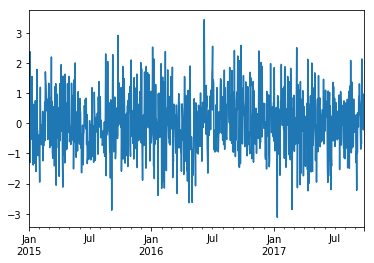

In [43]:
%matplotlib inline

s = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2015', periods=1000)) # 1000 days
s.plot()

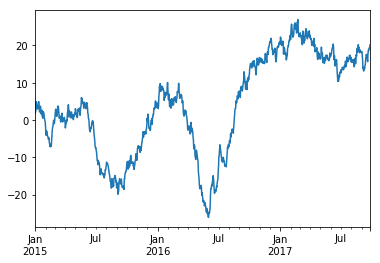

In [44]:
s = s.cumsum()
s.plot()

In [45]:
r = s.rolling(window=60)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-10          NaN
2015-01-11          NaN
2015-01-12          NaN
2015-01-13          NaN
2015-01-14          NaN
2015-01-15          NaN
2015-01-16          NaN
2015-01-17          NaN
2015-01-18          NaN
2015-01-19          NaN
2015-01-20          NaN
2015-01-21          NaN
2015-01-22          NaN
2015-01-23          NaN
2015-01-24          NaN
2015-01-25          NaN
2015-01-26          NaN
2015-01-27          NaN
2015-01-28          NaN
2015-01-29          NaN
2015-01-30          NaN
                ...    
2017-08-28    15.983521
2017-08-29    16.078811
2017-08-30    16.159154
2017-08-31    16.249788
2017-09-01    16.336339
2017-09-02    16.416803
2017-09-03    16.464115
2017-09-04    16.495541
2017-09-05    16.490524
2017-09-06    16.491888
2017-09-07    16

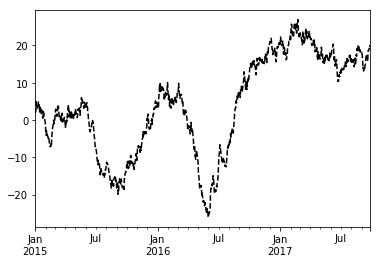

In [47]:
s.plot(style='k--')

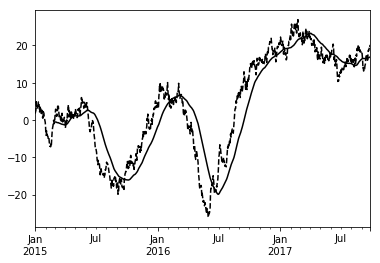

In [49]:
# Windows indicates that is moving average.

s.plot(style='k--')
r.mean().plot(style='k')

In [50]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index = pd.date_range('1/1/2015', periods=1000),
    columns = ['A', 'B', 'C', 'D']
)

df

,A,B,C,D
2015-01-01,0.522490,-0.624657,0.504737,-1.005673
2015-01-02,1.655735,-0.414421,-1.462681,-0.158113
2015-01-03,-0.412965,-0.601069,0.929654,0.365135
2015-01-04,-1.169545,-1.183840,0.607957,0.158857
2015-01-05,-0.010995,-0.579846,0.065675,0.607475
2015-01-06,0.401573,-1.375936,-0.252360,-0.454577
2015-01-07,-0.183357,-0.345527,-0.139016,0.830081
2015-01-08,0.602258,0.895603,0.256727,-0.363904
2015-01-09,-0.316805,-0.159120,-0.998442,-0.837035
2015-01-10,-0.467302,-0.745419,-1.193148,-0.226074


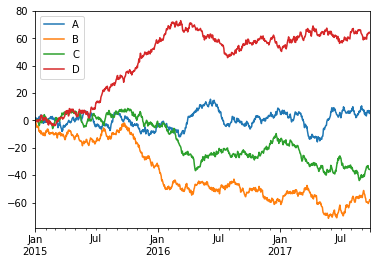

In [51]:
df = df.cumsum()
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x130187a58>,
      dtype=object)

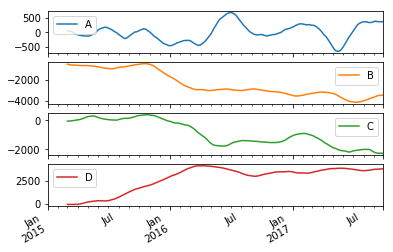

In [52]:
df.rolling(window=60).sum().plot(subplots=True)

* expanding : Return an Expanding object allowing summary functions to be applied cumulatively.

In [53]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2015-01-01,0.522490,-0.624657,0.504737,-1.005673
2015-01-02,1.350358,-0.831867,-0.226603,-1.084729
2015-01-03,1.488659,-1.101294,-0.160499,-0.989370
2015-01-04,1.265423,-1.531967,0.024543,-0.901976
2015-01-05,1.129282,-1.906340,0.148702,-0.728045


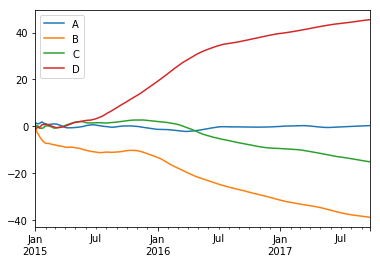

In [55]:
df.expanding(min_periods=1).mean().plot()